<a href="https://colab.research.google.com/github/Fairly-fire/C-Graded-Quiz/blob/main/DataStoryTellingStageC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Web Scraping with Analysis in Python**

In [3]:
pip install fake-useragent --quiet

In [24]:
#Web Scraping with Analysis in Python
import requests
from fake_useragent import UserAgent
import pandas as pd
import bs4
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
#Give the input of the product you are looking for along with the Budget range
product_name = input("Enter the name of the product you're searching for: ")
print("Enter your budget range ")
start_price = int(input("Start Range (Rs.): "))
end_price = int(input("End Range (Rs.): "))

Enter the name of the product you're searching for: Tablet
Enter your budget range 
Start Range (Rs.): 10000
End Range (Rs.): 20000


In [40]:
#create the lists for storing the product and its features along with the dataframe
#to store the entire data extract from unstructured format to structured format
product = []
rating = []
price = []

df = pd.DataFrame()

In [41]:
#Creating a user agent 
user_agent = UserAgent()

In [42]:
#Extract data from multiple pages of the product listing we’re going to use a for loop.
#The range will specify the number of pages to be extracted. The data that we 
#extract is unstructured data. So we’ll create empty lists to store them in a structured form.

In [55]:
#Crawling and scraping the data from the website. Once extracted entire data 
#from the web site, store it in the data frame.
for i in range(1,10):
  url = "https://www.flipkart.com/search?q={0}&page={1}"
  url = url.format(product_name,i)
  print("URL : ",url)

  # getting the response from the page using get method of requests module
  page = requests.get(url, headers={"user-agent": user_agent.chrome})

  # storing the content of the page in a variable
  html = page.content

  # creating BeautifulSoup object
  page_soup = bs4.BeautifulSoup(html, "html.parser")

  for containers in page_soup.findAll('div',{'class':'_2kHMtA'}):

    name = containers.find('div', attrs={'class':'_4rR01T'})
    product.append(name.text)

    rate = containers.find('div', attrs={'class':'_3LWZlK'})
    rating.append(rate.text) if type(rate) == bs4.element.Tag else rating.append('NaN')

    cost = containers.find('div', attrs={'class':'_30jeq3 _1_WHN1'})
    price.append(cost.text) if type(cost) == bs4.element.Tag else price.append('NaN')
df = pd.DataFrame({'Product Name': product, 'Rating': rating, 'Price': price})

URL :  https://www.flipkart.com/search?q=Tablet&page=1
URL :  https://www.flipkart.com/search?q=Tablet&page=2
URL :  https://www.flipkart.com/search?q=Tablet&page=3
URL :  https://www.flipkart.com/search?q=Tablet&page=4
URL :  https://www.flipkart.com/search?q=Tablet&page=5
URL :  https://www.flipkart.com/search?q=Tablet&page=6
URL :  https://www.flipkart.com/search?q=Tablet&page=7
URL :  https://www.flipkart.com/search?q=Tablet&page=8
URL :  https://www.flipkart.com/search?q=Tablet&page=9


In [56]:
df

,Product Name,Rating,Price
0,Lenovo Tab M10 FHD Plus (2nd Gen) 4 GB RAM 128...,4.3,"₹15,999"
1,Lenovo Tab P11 4 GB RAM 128 GB ROM 11.0 inches...,4.3,"₹19,999"
2,SAMSUNG Galaxy Tab S7+ With Stylus 6 GB RAM 12...,4.6,"₹47,999"
3,APPLE iPad (9th Gen) 64 GB ROM 10.2 inch with ...,4.6,"₹29,990"
4,realme Pad Mini 3 GB RAM 32 GB ROM 8.7 inch wi...,4.3,"₹10,999"
...,...,...,...
379,Lenovo Tab M10 (HD) 4 GB RAM 64 GB ROM 10.1 in...,4.2,"₹16,999"
380,APPLE ipad Mini (2019) 64 GB ROM 7.9 inch with...,4.6,"₹41,900"
381,Swipe X1 Tab FHD IPS Display Octa Core 4 GB RA...,3.8,"₹15,999"
382,Lenovo Tab P11 Pro 6 GB RAM 128 GB ROM 11.5 in...,4.3,"₹39,999"


In [57]:
df.shape

(384, 3)

In [58]:
#data cleaning for our analysis. Lets trim the currency “₹” and “,” and have
# only the price in the column. We use regex function by converting the 
#datatype of the Price column to String as the datatype of all the columns is 
#Object by default. Once it is trimmed, convert the datatype of Price and Rating to float type
df['Price'] =df['Price'].str.lstrip('₹')
df['Price'] =df['Price'].replace({',':''}, regex=True)

df['Price'] = df['Price'].astype(float) #Converting data type from Object to float

df['Rating'] = df['Rating'].astype(float) #Converting data type from Object to float
df.dtypes

Product Name     object
Rating          float64
Price           float64
dtype: object

In [59]:
#removing duplicates
df.drop_duplicates(subset="Product Name", keep=False, inplace=True)

In [60]:
#data after trimming and conversion
df.head()
print(df.shape)

(64, 3)


In [61]:
#filter and sort the price range which was given as input
df = df[(start_price < df['Price']) & (df['Price'] < end_price)] 
print(df.shape)
df1 = df.sort_values(['Price','Rating'], ascending = (False,False))
df1 = df1.head(25)
df1

(13, 3)


,Product Name,Rating,Price
216,realme Pad X 4 GB RAM 64 GB ROM 11 inch with W...,4.4,19999.0
220,MOTOROLA tab g70 LTE 4 GB RAM 64 GB ROM 11 inc...,4.3,19999.0
245,SAMSUNG Galaxy Tab A7 3 GB RAM 64 GB ROM 10.4 ...,4.4,18999.0
249,Lenovo Tab K10 FHD 4 GB RAM 64 GB ROM 10.3 inc...,4.3,17999.0
191,Alcatel 3T10 with Speaker 2 GB RAM 16 GB ROM 1...,3.9,16999.0
190,Lenovo Tab K10 FHD 4 GB RAM 64 GB ROM 10.3 inc...,4.3,16499.0
174,Lenovo Yoga 3 (2 GB RAM) 2 GB RAM 16 GB ROM 8 ...,4.3,15828.0
41,SAMSUNG Galaxy Tab A7 Lite 3 GB RAM 32 GB ROM ...,4.3,14999.0
171,Lenovo Tab K10 FHD 3 GB RAM 32 GB ROM 10.3 inc...,4.3,14999.0
262,SAMSUNG Galaxy Tab A7 Lite 3 GB RAM 32 GB ROM ...,4.3,14999.0


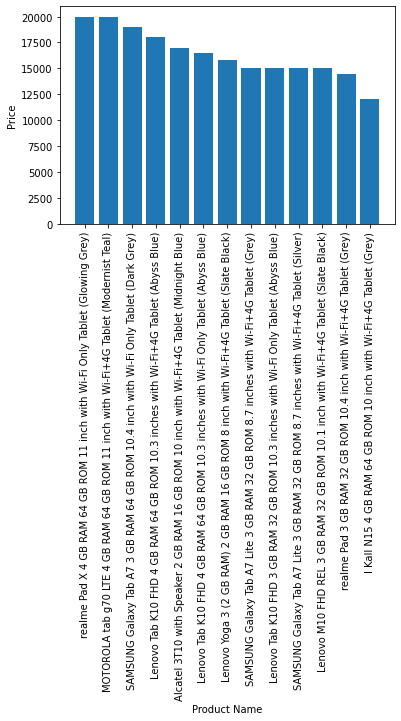

In [62]:
#Visualize the Tablet against the price.
fig, ax = plt.subplots()
ax.bar(df1['Product Name'],df1['Price'])
ax.set_xticklabels(df1['Product Name'],rotation= 90)
ax.set_ylabel("Price")
ax.set_xlabel("Product Name")
plt.show()

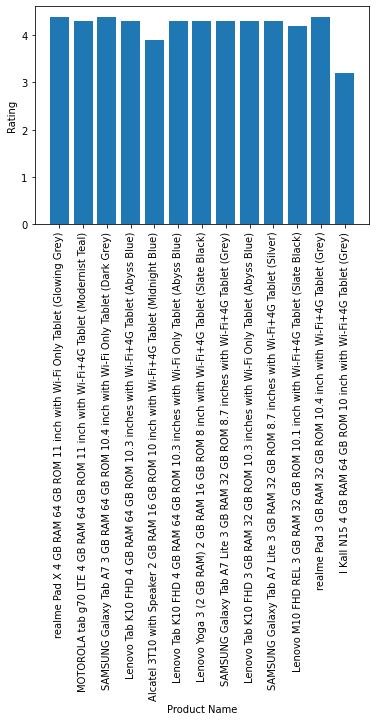

In [63]:
#Visualize the Tablet against the rating.
fig, ax = plt.subplots()
ax.bar(df1['Product Name'],df1['Rating'])
ax.set_xticklabels(df1['Product Name'],rotation= 90)
ax.set_ylabel("Rating")
ax.set_xlabel("Product Name")
plt.show()

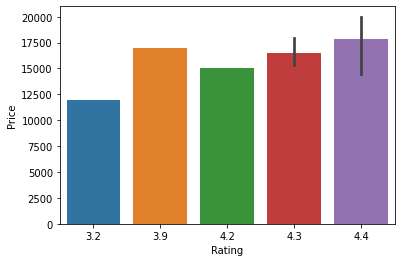

In [64]:
#Price vs rating
sns.barplot(x=df1['Rating'],y=df1['Price'], linewidth=2.5)

In [53]:
#we can conclude that in this range, buying a tablet priced more than Rs. 15000 would be a wise choice